# Why python?

![alt](3ed7l4.jpg)![alt](prz7lg2pv6231.jpg)

In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
mpl.style.use(["ggplot"])

# Table of content

* [Data collection](#Data)
* [Logistic Regression](#lr)
* [Random forest](#forest)
* [interpretation](#interpretation)

# Data collection <a name="Data"></a>

The credit risk analysis, we will do, is based on a kaggle [dataset](https://www.kaggle.com/c/GiveMeSomeCredit). I download it in the folder of my Github. 
It contains different files
* Data Dictionary.xls : the definition of the the variables
* cs-test.csv : a dataset containing a set of observations without the target values
* cs-training.csv : a dataset containing a set of observations with their target values

## Download 

In [26]:
CreditRisk_training = pd.read_csv("GiveMeSomeCredit/cs-training.csv")

In [27]:
print("the shape of the dataset is: {}".format(CreditRisk_training.shape))
CreditRisk_training.head()

the shape of the dataset is: (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Variables descriptions
The variables of this dataset are as follows:

1. **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse 
2. **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
3. **Age**: Age of borrower in years
4. **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income
6. **MonthlyIncome**: Monthly income
7. **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
8. **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.
9. **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit
10. **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
11. **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.).3

In [28]:
df = CreditRisk_training.copy()
df.rename(columns={"Unnamed: 0":"Id"},inplace=True)
df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


## Are there some missing values?

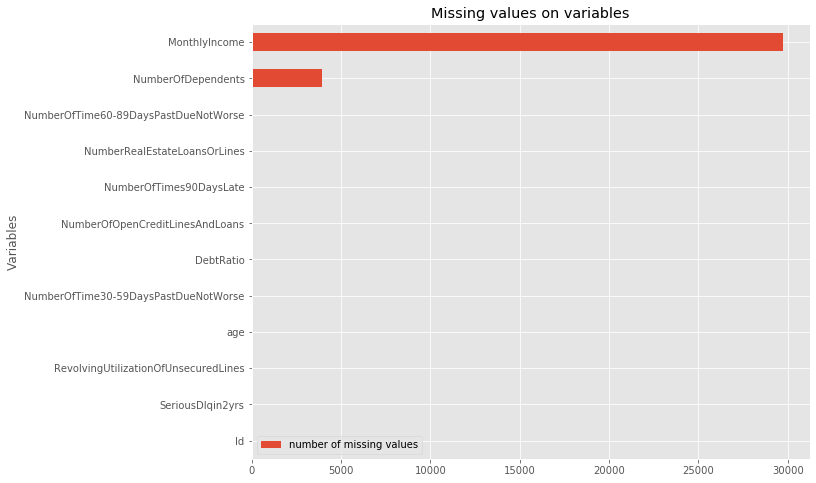

In [30]:
y = df.isnull().sum()
(fig,ax) = plt.subplots(figsize=(10,8))


pd.DataFrame(y).reset_index().sort_values(0).plot(ax=ax,kind="barh",y=0,x="index",label="number of missing values")
plt.ylabel("Variables")
plt.title("Missing values on variables")
plt.show()

Two variables with missing values: MonthlyIncome and NumberOfDependents

## Target

In [31]:
df.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

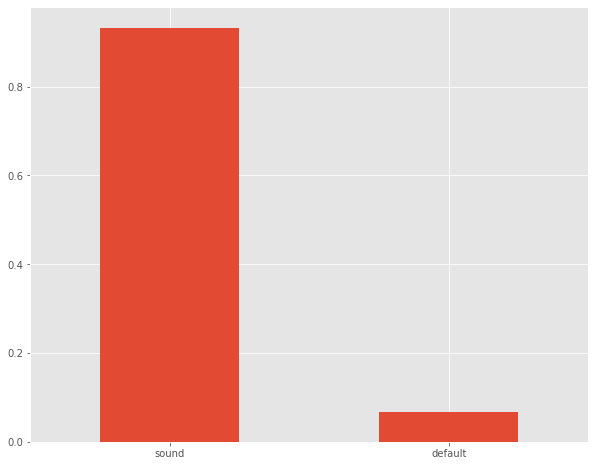

In [32]:
(fig,ax) = plt.subplots(figsize=(10,8))
df.SeriousDlqin2yrs.value_counts(normalize=True).plot(kind="bar")
plt.xticks([0,1], ["sound","default"], rotation='horizontal')
plt.show()

## Training/test split 

In [33]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=42,stratify = df.SeriousDlqin2yrs)

In [34]:
train_df.shape

(120000, 12)

In [35]:
test_df.shape

(30000, 12)

# Logistic Regression: <a name="lr"></a>

##  Feature analysis

### Monthly Income

The monthly Income represents the cashflow that the Individual receives each month. The distribution of the wealth is usually positively skewed. Let's the distribution of our dataset:

In [36]:
log_income=np.log(train_df.MonthlyIncome+0.0005)
train_df.insert(7,"log_income",log_income)

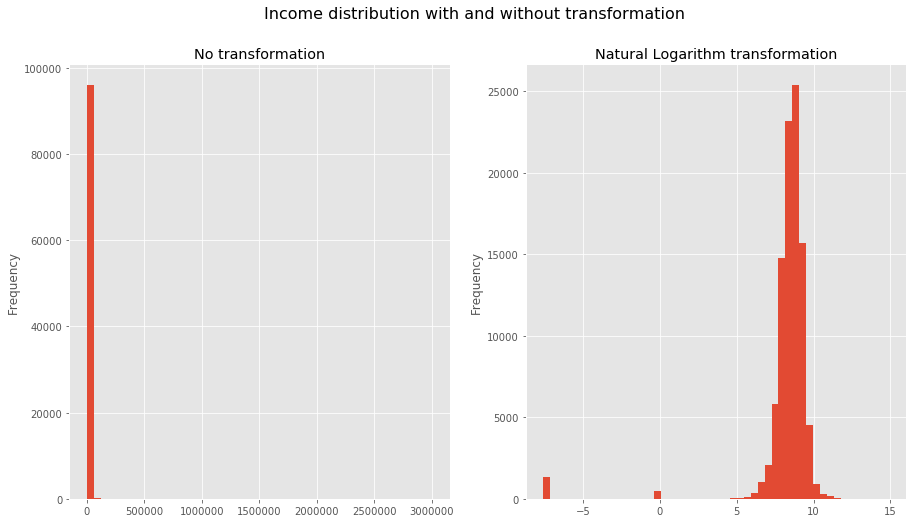

In [37]:
(fig,(ax1,ax2)) = plt.subplots(1,2,figsize=(15,8))
fig.suptitle("Income distribution with and without transformation",fontsize=16)
ax2.set_title("Natural Logarithm transformation")
ax1.set_title("No transformation")

train_df.MonthlyIncome.plot(ax=ax1,kind="hist",x="MonthlyIncome",bins=50)
train_df.log_income.plot(ax=ax2,kind="hist",x="log_income",bins=50)

plt.show()

Due to the high level of skewness in the Income, we will work with its logarithm transformation. However, there are some observations with **zero** income. In order to make the transformation works, we will add a small *epsilon*.

In [38]:
train_df.MonthlyIncome.isnull().sum()/train_df.shape[0]

0.19729166666666667

20% of the dataset has a missing income

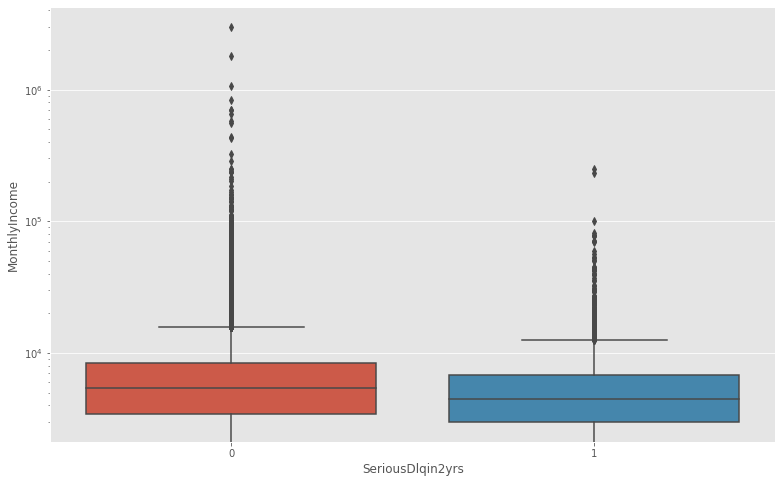

In [39]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
sns.boxplot(x="SeriousDlqin2yrs",y="MonthlyIncome",data=train_df,ax=ax)
plt.show()

In [40]:
train_df[train_df.MonthlyIncome.isnull()].loc[:,"SeriousDlqin2yrs"].mean()

0.05571277719112988

In [41]:
train_df.loc[:,"SeriousDlqin2yrs"].mean()

0.06684166666666666

### Fine Classing

Fine classing is a easy way to transform quantitative variables into categorical variables. We simply create intervals and, instead of representing an observation by its value, we represent it by the interval it belongs to.
Here, the interval will be defined by the *quantile*. Hence, each category will have approximatively the same number of observation

In [42]:
Income_cat = pd.qcut(train_df.log_income,q=30)
train_df.insert(7,"cat_income",Income_cat)

### Coarse Classing

In fact, fine classing is not the goal by itself. The goal is to create distinct classes with specific level of "risk". This is done by aggregating adjacent classes with similar level of risk.
The risk of a class $i$ (i.e $X=i$) is calculated with the **Weight of Evidence (WoE)**:

$$ WoE_{i}=log\bigg( \frac{Odd^{(i)}_{1/0}}{Odd_{1/0}}\bigg)$$
Where $Odd^{(i)}_{1/0}=\frac{P(Y=1|X=i)}{P(Y=0|X=i)}$ and $Odd_{1/0}=\frac{P(Y=1)}{P(Y=0)}$

Therefore, $$WoE_{i}=log\bigg( \frac{P(Y=1|X=i)}{P(Y=0|X=i)}  \frac{P(Y=0)}{P(Y=1)}\bigg)$$

Then, we can merge the adjacent classes having similar value of $WoE$. One advantage of this method is that it gives a way to handle missing values. Indeed, the missing value can be assign to the category having its risk. 

In [43]:
def summary_woe_func(X,y,df):
    #df[X]=df[X].astype(type_)
    df_missing = df[df[X].isnull()]
    
    summary_woe = df.groupby(X).agg({y:["count","sum"]})
    summary_woe.columns =["Count","Event"]
    summary_woe["perc"]=summary_woe.Count/summary_woe.sum().Count
    summary_woe["Non_event"]=summary_woe.Count-summary_woe.Event
    summary_woe["odd_i"] = summary_woe.Event/summary_woe.Non_event
    
    overall_event = summary_woe.sum().Event
    overall_non_event = summary_woe.sum().Non_event
    overall_odd = overall_event/overall_non_event
    
    data_set=pd.DataFrame()
    
    if df_missing.shape[0]!=0:
        data_set = df_missing.agg({y:["count","sum"]}).T
        data_set["Non_event"]=data_set["count"]-data_set["sum"]
        data_set["odd_i"] = data_set["sum"]/data_set["Non_event"]
        data_set["woe"]=np.log(data_set.odd_i/overall_odd)
   
    summary_woe["woe"]=np.log(summary_woe.odd_i/overall_odd)
    IV = ((summary_woe.Event/overall_event - summary_woe.Non_event/overall_non_event)*summary_woe.woe).sum()
    
    return({"summary_woe":summary_woe,"IV":IV,"missing":data_set})

In [44]:
def representation_woe(summary_tabl,data_missing):
    #Build the figure
    fig = plt.figure(figsize=(12,8))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    #construct the axes
    main_ax = fig.add_subplot(grid[1:,:])
    volume_ax = fig.add_subplot(grid[0,:], sharex=main_ax)

    #draw the graphs on the respective axis
    summary_tabl.plot(ax=volume_ax,kind="bar",y="perc",color="red",label="Size of each Bucket",alpha=0.5)
    if data_missing.shape[0]!=0:
        main_ax.axhline(data_missing["woe"][0],color="green",label="WoE of the observations with missing values")

    summary_tabl.plot(ax=main_ax,kind="bar",y="woe",label="Weight of evidence",color="blue")
    main_ax.legend()

    plt.show()
    return None

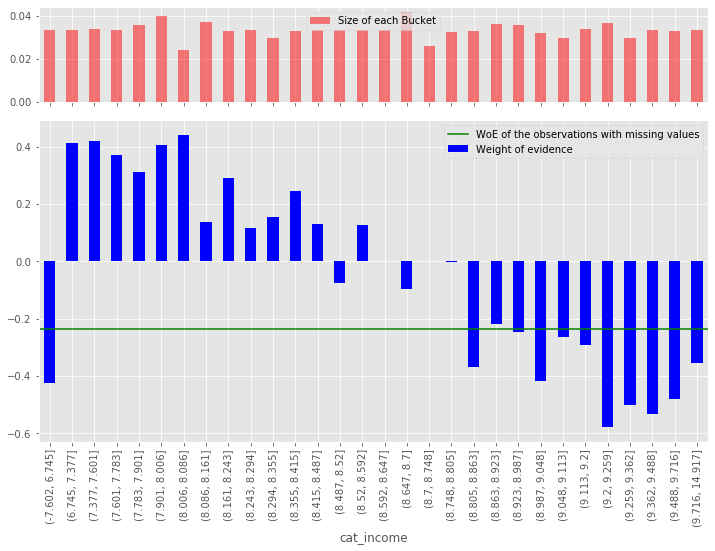

In [45]:
woe_Income = summary_woe_func("cat_income","SeriousDlqin2yrs",train_df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

The very low Income Bucket is strangely a very low risk category 

In [46]:
group_1=['(6.745, 7.377]','(7.377, 7.601]','(7.601, 7.783]','(7.783, 7.901]','(7.901, 8.006]','(8.006, 8.086]']
group_2=['(8.086, 8.161]','(8.161, 8.243]','(8.243, 8.294]','(8.294, 8.355]','(8.355, 8.415]','(8.415, 8.487]']
group_3=['(8.487, 8.52]','(8.52, 8.592]','(8.592, 8.647]','(8.647, 8.7]','(8.7, 8.748]','(8.748, 8.805]']
group_4=['(8.805, 8.863]','(8.863, 8.923]','(8.923, 8.987]','(8.987, 9.048]','(9.048, 9.113]','(9.113, 9.2]','nan']
group_5 = ['(9.2, 9.259]','(9.259, 9.362]','(9.362, 9.488]','(9.488, 9.716]','(9.716, 14.917]']


cat_income_final = [pd.Interval(left=6.745,right=8.086,closed="right") if str(x) in group_1 else x for x in train_df["cat_income"] ]
cat_income_final = [pd.Interval(left=8.086,right=8.487,closed="right") if str(x) in group_2 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.487,right=8.805,closed="right") if str(x) in group_3 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.805,right=9.2,closed="right") if str(x) in group_4 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=9.2,right=14.917,closed="right") if str(x) in group_5 else x for x in cat_income_final ]

In [47]:
train_df["cat_income_final"] = cat_income_final

<ipython-input-47-c86e6edc90f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cat_income_final"] = cat_income_final


In [48]:
train_df["cat_income_final"].value_counts()

(8.805, 9.2]       42955
(8.487, 8.805]     19286
(6.745, 8.086]     19271
(8.086, 8.487]     19252
(9.2, 14.917]      16018
(-7.602, 6.745]     3218
Name: cat_income_final, dtype: int64

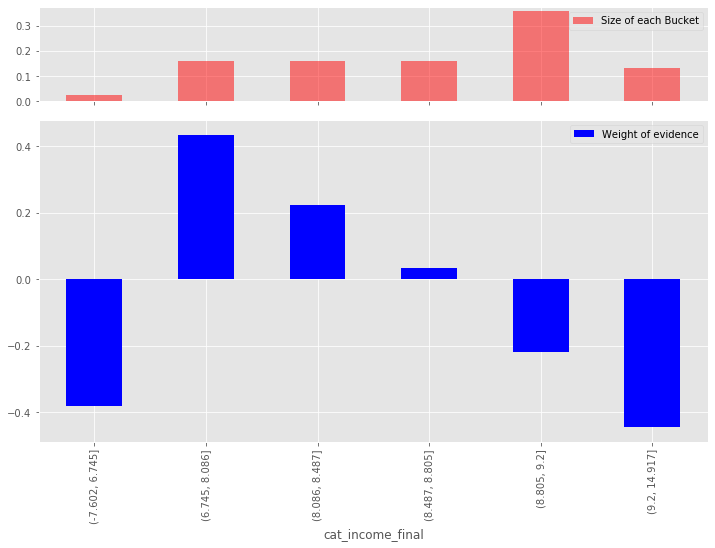

In [49]:
woe_Income = summary_woe_func("cat_income_final","SeriousDlqin2yrs",train_df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

### Number Of dependent

c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


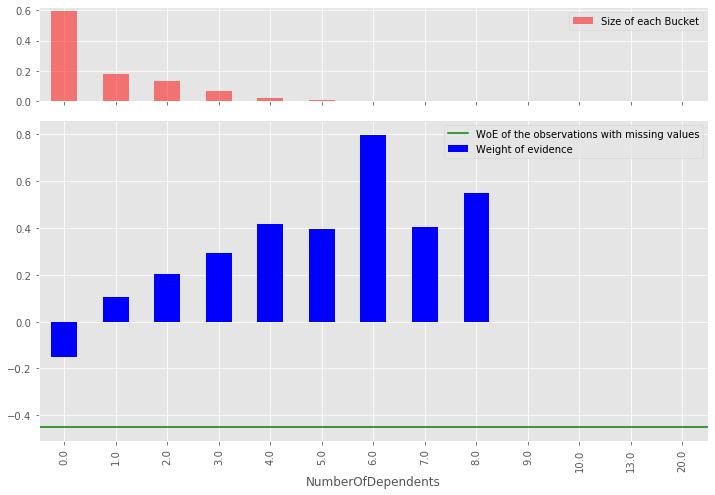

In [50]:
woe = summary_woe_func("NumberOfDependents","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

<ipython-input-51-61880720ea21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["dep_final"]=dep_final


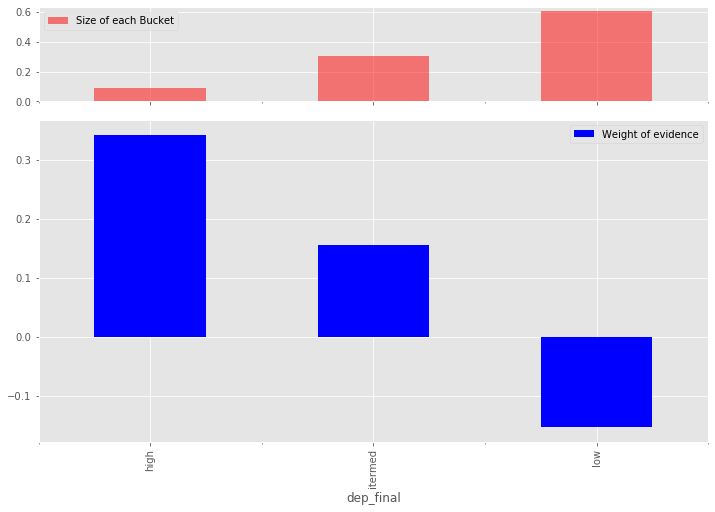

In [51]:
group_1 = [1.0,2.0]
group_2 = ['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','13.0','20.0']
group_3 = ['0.0','nan']

dep_final = ['itermed' if x in group_1 else str(x) for x in train_df["NumberOfDependents"] ]
dep_final = ['high' if x in group_2 else x for x in dep_final ]
dep_final = ['low' if x in group_3 else x for x in dep_final ]

train_df["dep_final"]=dep_final
woe = summary_woe_func("dep_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

### RevolvingUtilizationOfUnsecuredLines

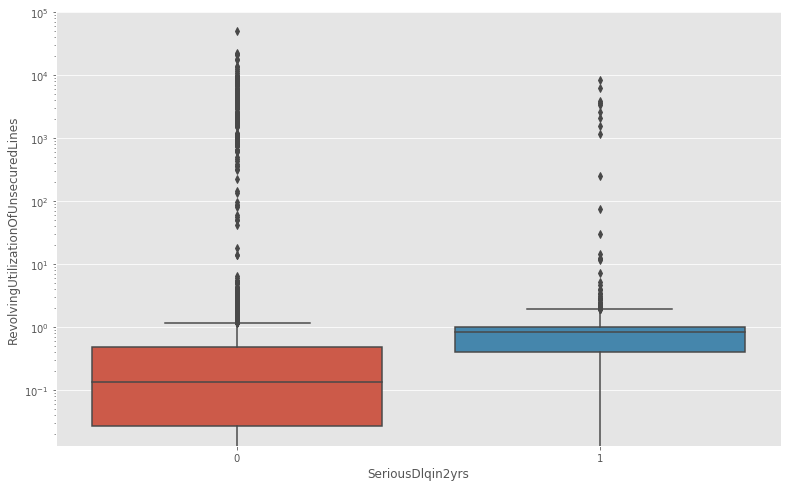

In [52]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
sns.boxplot(x="SeriousDlqin2yrs",y="RevolvingUtilizationOfUnsecuredLines",data=train_df,ax=ax)
plt.show()

In [53]:
log_Revolving = np.log(train_df.RevolvingUtilizationOfUnsecuredLines+0.00005)
train_df.insert(7,"log_Revolving",log_Revolving)

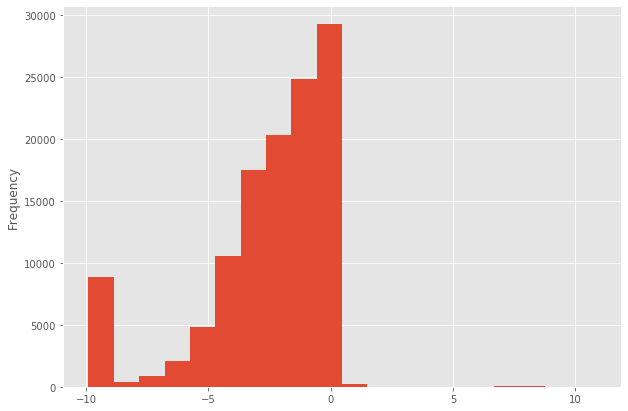

In [54]:
train_df.log_Revolving.plot.hist(bins=20,figsize=(10,7))
plt.show()

In [55]:
Revolving_cat = pd.qcut(train_df.log_Revolving,q=10)

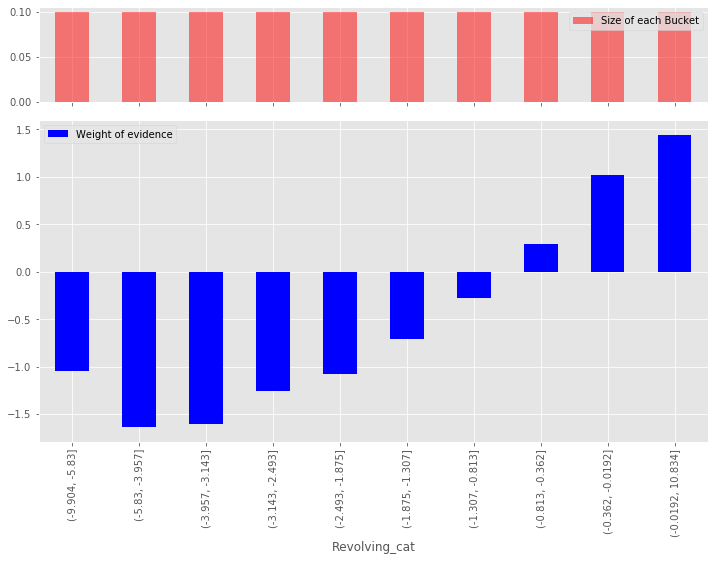

In [56]:
train_df.insert(7,"Revolving_cat",Revolving_cat)
woe = summary_woe_func("Revolving_cat","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

In [57]:
train_df["revolving_final"] = train_df["Revolving_cat"]

<ipython-input-57-059c846edb19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["revolving_final"] = train_df["Revolving_cat"]


### Age

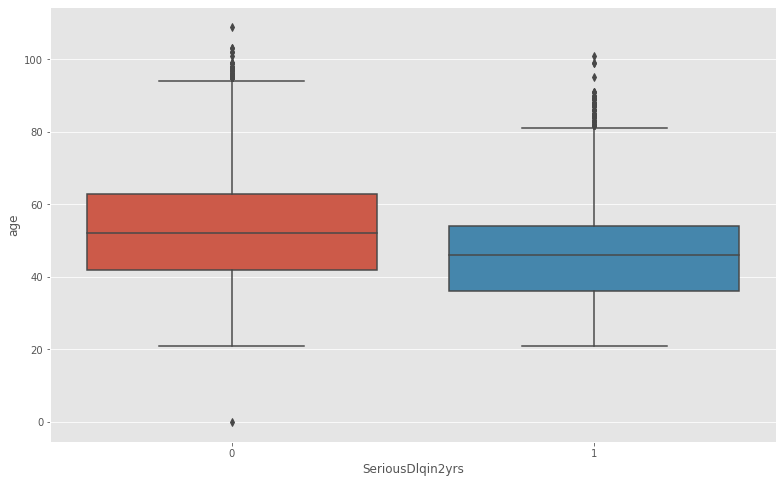

In [58]:
(fig,ax)=plt.subplots(figsize=(13,8))
sns.boxplot(x="SeriousDlqin2yrs",y="age",data=train_df,ax=ax)
plt.show()

In [59]:
train_df.age.describe()

count    120000.000000
mean         52.287842
std          14.771274
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

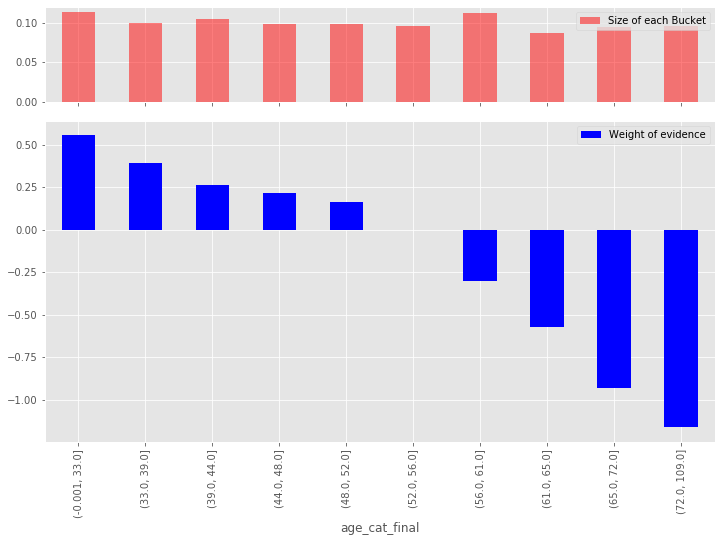

In [60]:
age_cat = pd.qcut(train_df.age,q=10)
train_df.insert(7,"age_cat_final",age_cat)
woe_age = summary_woe_func("age_cat_final","SeriousDlqin2yrs",train_df)
representation_woe(woe_age["summary_woe"],woe_age['missing'])

### NumberOfTime30-59DaysPastDueNotWorse

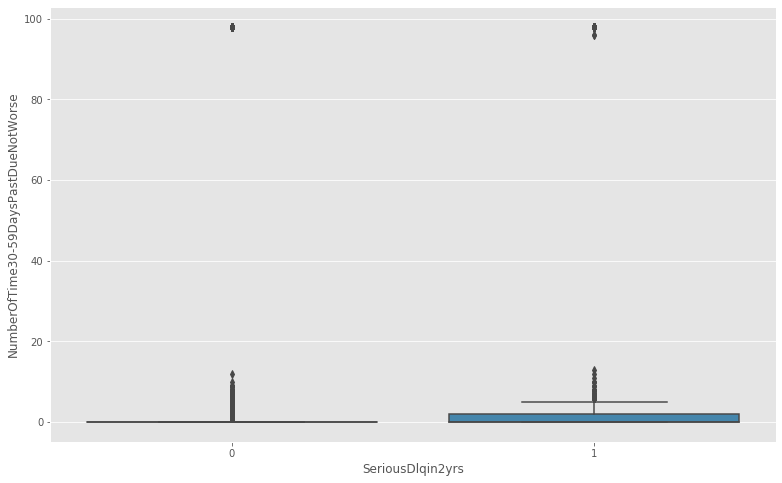

In [61]:
(fig,ax)=plt.subplots(figsize=(13,8))
sns.boxplot(x="SeriousDlqin2yrs",y="NumberOfTime30-59DaysPastDueNotWorse",data=train_df,ax=ax)
plt.show()

In [62]:
train_df.loc[:,["SeriousDlqin2yrs","NumberOfTime30-59DaysPastDueNotWorse"]].groupby("SeriousDlqin2yrs").describe()

NumberOfTime30-59DaysPastDueNotWorse                       \
                                                count      mean        std   
SeriousDlqin2yrs                                                             
0                                            111979.0  0.280151   2.938073   
1                                              8021.0  2.373520  11.708167   

                                            
                  min  25%  50%  75%   max  
SeriousDlqin2yrs                            
0                 0.0  0.0  0.0  0.0  98.0  
1                 0.0  0.0  0.0  2.0  98.0

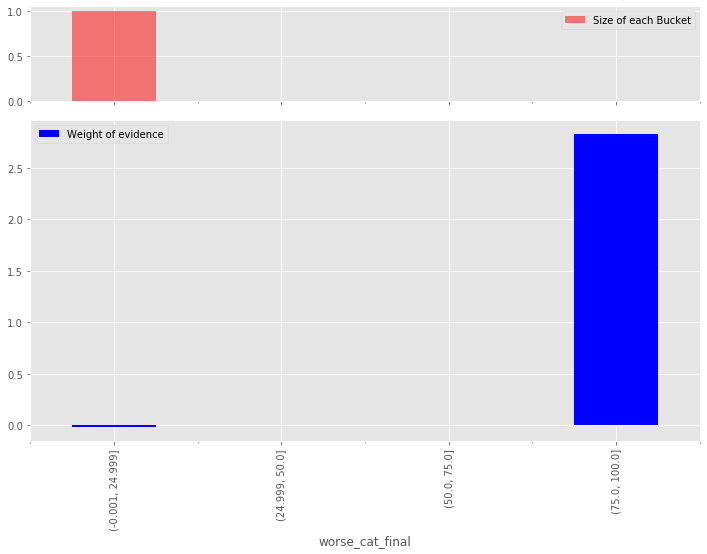

In [63]:
test_cut = np.linspace(-0.001,100,5)
worse_cat = pd.cut(train_df["NumberOfTime30-59DaysPastDueNotWorse"],test_cut)
train_df.insert(7,"worse_cat_final",worse_cat)
woe = summary_woe_func("worse_cat_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

In [64]:
train_df.worse_cat_final.value_counts()

(-0.001, 24.999]    119786
(75.0, 100.0]          214
(50.0, 75.0]             0
(24.999, 50.0]           0
Name: worse_cat_final, dtype: int64

### DebtRatio 

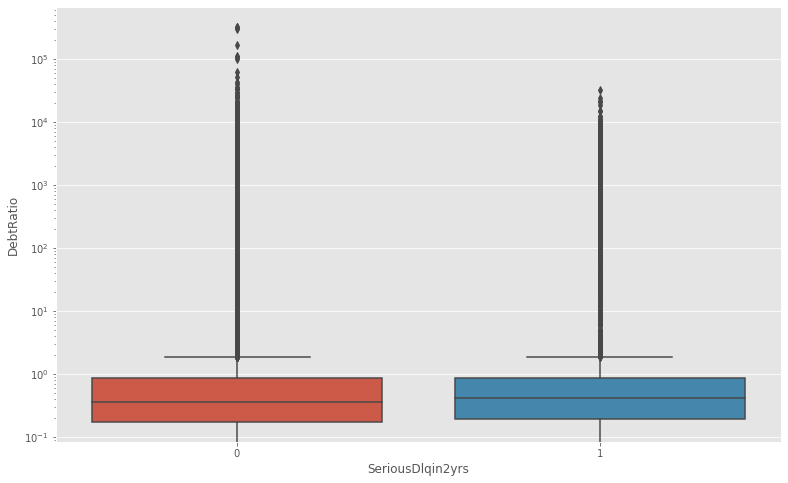

In [65]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
sns.boxplot(x="SeriousDlqin2yrs",y="DebtRatio",data=train_df,ax=ax)
plt.show()

In [66]:
log_DebtRatio = np.log(train_df.DebtRatio+0.00005)
train_df.insert(7,"log_DebtRatio",log_DebtRatio)

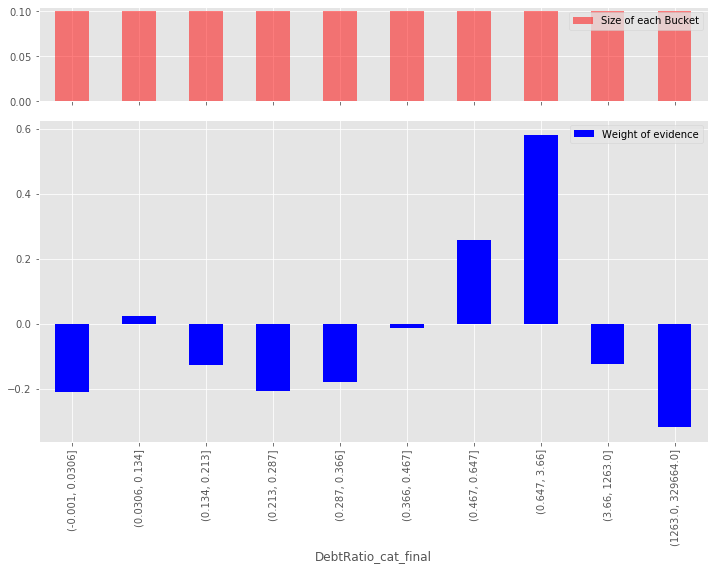

In [67]:
DebtRatio_cat = pd.qcut(train_df.DebtRatio,q=10)
train_df.insert(7,"DebtRatio_cat_final",DebtRatio_cat)
woe = summary_woe_func("DebtRatio_cat_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

### NumberOfOpenCreditLinesAndLoans

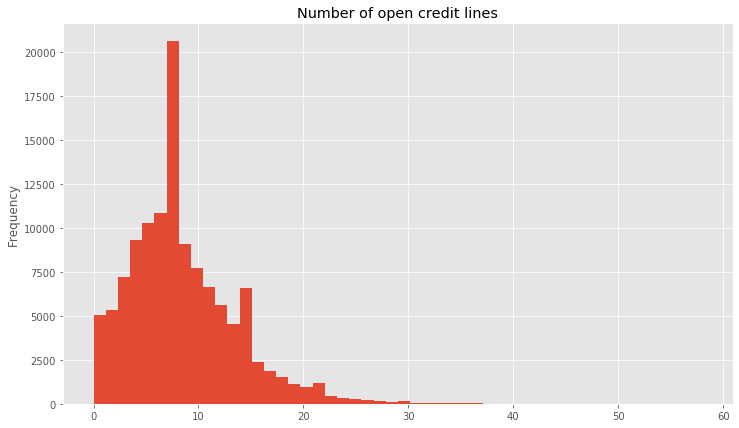

In [68]:
(fig,ax)=plt.subplots(figsize=(12,7))
ax.set_title("Number of open credit lines")
train_df.NumberOfOpenCreditLinesAndLoans.plot(kind="hist",bins=50)
plt.show()

In [69]:
train_df.NumberOfOpenCreditLinesAndLoans.describe()

count    120000.000000
mean          8.465692
std           5.161693
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


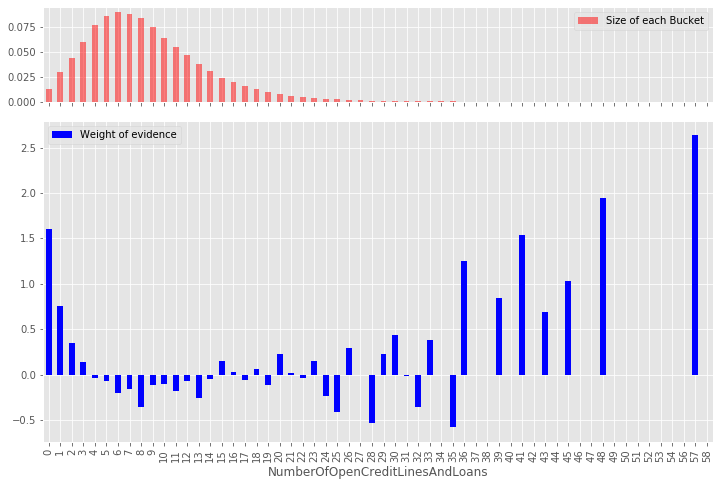

In [70]:
woe = summary_woe_func("NumberOfOpenCreditLinesAndLoans","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

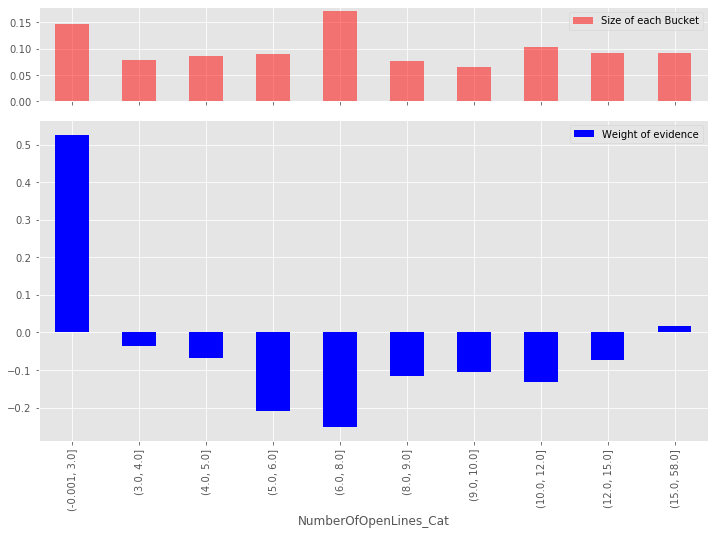

In [71]:
cat_number = pd.qcut(train_df.NumberOfOpenCreditLinesAndLoans,q=10)
train_df.insert(7,"NumberOfOpenLines_Cat",cat_number)
woe = summary_woe_func("NumberOfOpenLines_Cat","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

<ipython-input-72-17269694dcaf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["NumberOfOpenLines_Cat_final"]=NumberOfOpenLines_Cat_final


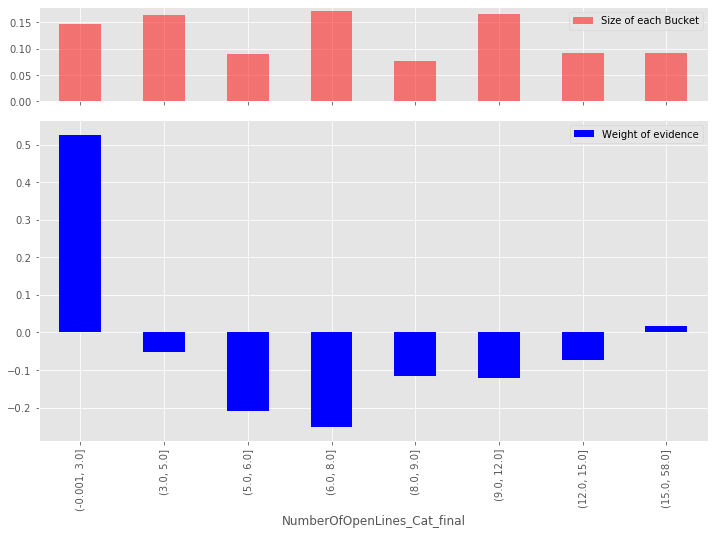

In [72]:
group_1=['(3.0, 4.0]','(4.0, 5.0]']
group_2=['(9.0, 10.0]','(10.0, 12.0]']

NumberOfOpenLines_Cat_final = [pd.Interval(left=3.0,right=5.0,closed="right") if str(x) in group_1 else x for x in train_df["NumberOfOpenLines_Cat"] ]
NumberOfOpenLines_Cat_final = [pd.Interval(left=9.0,right=12.0,closed="right") if str(x) in group_2 else x for x in NumberOfOpenLines_Cat_final ]

train_df["NumberOfOpenLines_Cat_final"]=NumberOfOpenLines_Cat_final
woe_Income = summary_woe_func("NumberOfOpenLines_Cat_final","SeriousDlqin2yrs",train_df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

### NumberOfTimes90DaysLate

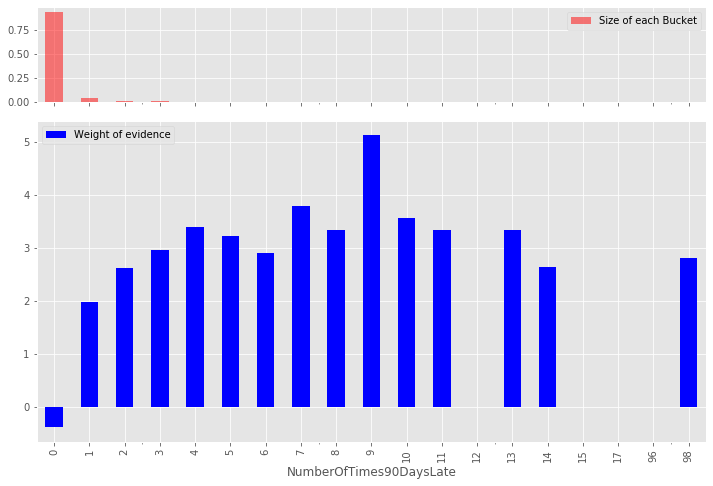

In [73]:
woe = summary_woe_func("NumberOfTimes90DaysLate","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

<ipython-input-74-f7747e42aba2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cat_numberTimes90Days_final"]=cat_numberTimes90Days


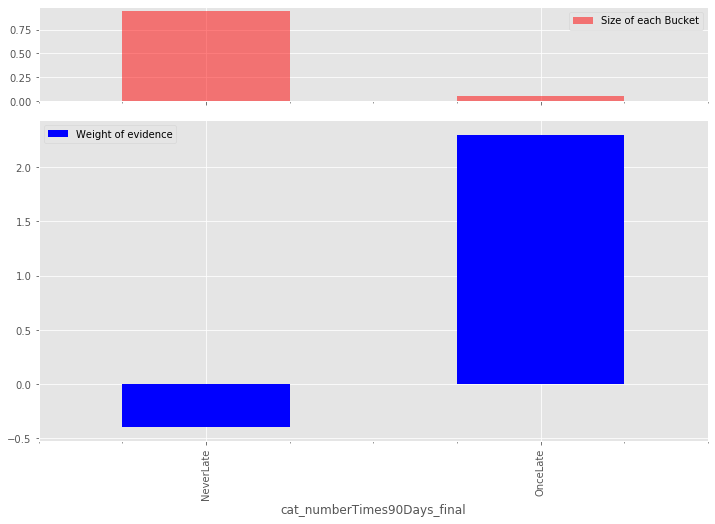

In [74]:
cat_numberTimes90Days = ["NeverLate" if x==0 else "OnceLate" for x in train_df.NumberOfTimes90DaysLate]

train_df["cat_numberTimes90Days_final"]=cat_numberTimes90Days
woe = summary_woe_func("cat_numberTimes90Days_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

### NumberRealEstateLoansOrLines

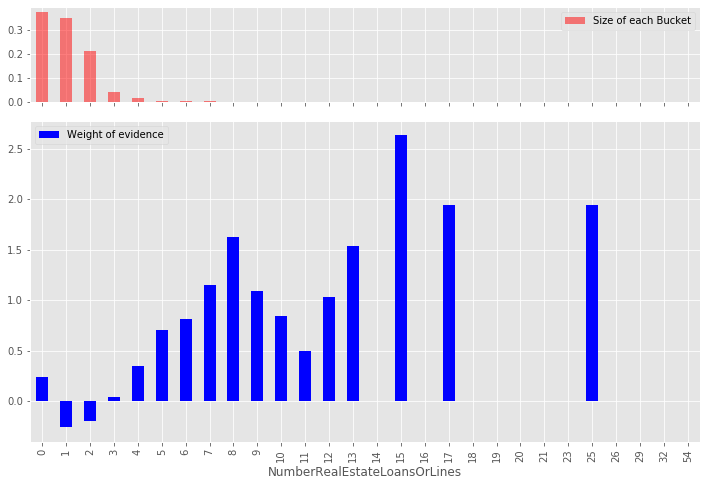

In [75]:
woe = summary_woe_func("NumberRealEstateLoansOrLines","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

<ipython-input-76-4a07e2a131e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["catRealEstateLoans_final"]=catRealEstateLoans


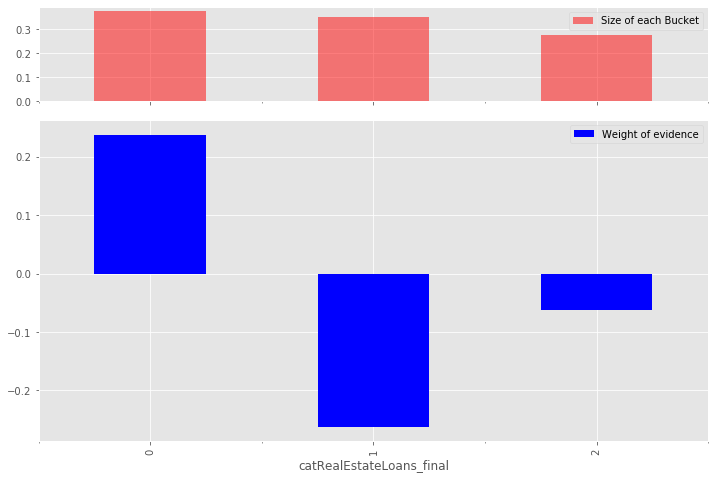

In [76]:
catRealEstateLoans = ["2" if x>1 else str(x) for x in train_df.NumberRealEstateLoansOrLines]

train_df["catRealEstateLoans_final"]=catRealEstateLoans
woe = summary_woe_func("catRealEstateLoans_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

### NumberOfTime60-89DaysPastDueNotWorse

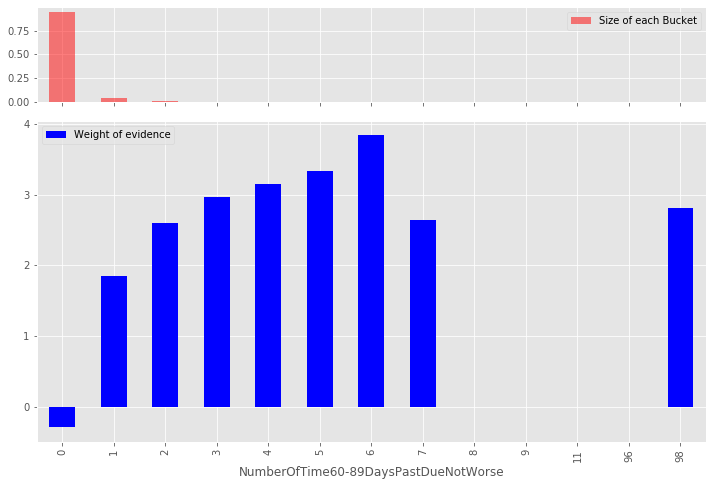

In [77]:
woe = summary_woe_func("NumberOfTime60-89DaysPastDueNotWorse","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

<ipython-input-78-df5c391f189c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cat_NumberOfTime60_89_final"]=cat_NumberOfTime60_89


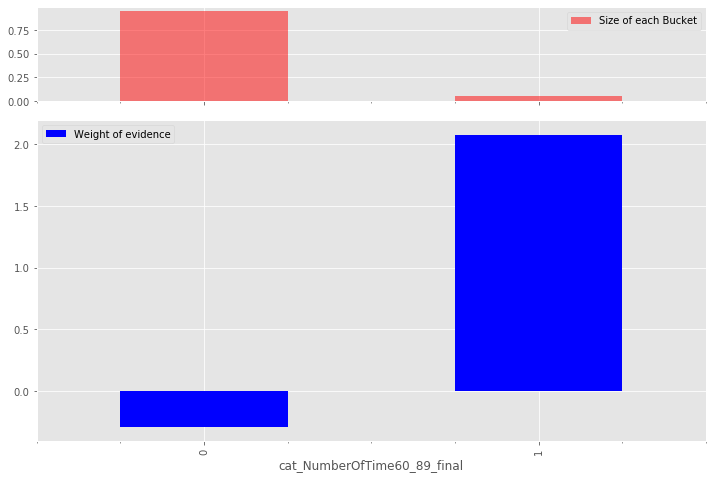

In [78]:
cat_NumberOfTime60_89 = ["0" if x==0 else "1" for x in train_df["NumberOfTime60-89DaysPastDueNotWorse"]]

train_df["cat_NumberOfTime60_89_final"]=cat_NumberOfTime60_89
woe = summary_woe_func("cat_NumberOfTime60_89_final","SeriousDlqin2yrs",train_df)
representation_woe(woe["summary_woe"],woe['missing'])

## Synthesis <a name="synthesis"></a>

### Variable Selection <a name="selection"></a>

In [79]:
train_df.columns.values

array(['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenLines_Cat', 'DebtRatio_cat_final',
       'log_DebtRatio', 'worse_cat_final', 'age_cat_final',
       'Revolving_cat', 'log_Revolving', 'cat_income', 'log_income',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'cat_income_final', 'dep_final', 'revolving_final',
       'NumberOfOpenLines_Cat_final', 'cat_numberTimes90Days_final',
       'catRealEstateLoans_final', 'cat_NumberOfTime60_89_final'],
      dtype=object)

In [80]:
liste_variable = [x for x in train_df.columns.values if bool(re.findall("final",x))]
IV_recap = pd.DataFrame({"Variable":liste_variable,"IV":[summary_woe_func(x,"SeriousDlqin2yrs",train_df)["IV"] for x in liste_variable]}).sort_values("IV",ascending=False)
IV_recap

,Variable,IV
5,revolving_final,1.110987
7,cat_numberTimes90Days_final,0.844395
9,cat_NumberOfTime60_89_final,0.576722
2,age_cat_final,0.246262
3,cat_income_final,0.086765
0,DebtRatio_cat_final,0.073561
6,NumberOfOpenLines_Cat_final,0.068723
8,catRealEstateLoans_final,0.045991
1,worse_cat_final,0.038932
4,dep_final,0.033366


In [81]:
features = pd.get_dummies(train_df.loc[:,liste_variable],drop_first=True)
features

,"DebtRatio_cat_final_(0.0306, 0.134]","DebtRatio_cat_final_(0.134, 0.213]","DebtRatio_cat_final_(0.213, 0.287]","DebtRatio_cat_final_(0.287, 0.366]","DebtRatio_cat_final_(0.366, 0.467]","DebtRatio_cat_final_(0.467, 0.647]","DebtRatio_cat_final_(0.647, 3.66]","DebtRatio_cat_final_(3.66, 1263.0]","DebtRatio_cat_final_(1263.0, 329664.0]","worse_cat_final_(24.999, 50.0]",...,"NumberOfOpenLines_Cat_final_(5.0, 6.0]","NumberOfOpenLines_Cat_final_(6.0, 8.0]","NumberOfOpenLines_Cat_final_(8.0, 9.0]","NumberOfOpenLines_Cat_final_(9.0, 12.0]","NumberOfOpenLines_Cat_final_(12.0, 15.0]","NumberOfOpenLines_Cat_final_(15.0, 58.0]",cat_numberTimes90Days_final_OnceLate,catRealEstateLoans_final_1,catRealEstateLoans_final_2,cat_NumberOfTime60_89_final_1
57836,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
132895,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
27981,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37852,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103813,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3895,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
109980,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
74354,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
features.columns

Index(['DebtRatio_cat_final_(0.0306, 0.134]',
       'DebtRatio_cat_final_(0.134, 0.213]',
       'DebtRatio_cat_final_(0.213, 0.287]',
       'DebtRatio_cat_final_(0.287, 0.366]',
       'DebtRatio_cat_final_(0.366, 0.467]',
       'DebtRatio_cat_final_(0.467, 0.647]',
       'DebtRatio_cat_final_(0.647, 3.66]',
       'DebtRatio_cat_final_(3.66, 1263.0]',
       'DebtRatio_cat_final_(1263.0, 329664.0]',
       'worse_cat_final_(24.999, 50.0]', 'worse_cat_final_(50.0, 75.0]',
       'worse_cat_final_(75.0, 100.0]', 'age_cat_final_(33.0, 39.0]',
       'age_cat_final_(39.0, 44.0]', 'age_cat_final_(44.0, 48.0]',
       'age_cat_final_(48.0, 52.0]', 'age_cat_final_(52.0, 56.0]',
       'age_cat_final_(56.0, 61.0]', 'age_cat_final_(61.0, 65.0]',
       'age_cat_final_(65.0, 72.0]', 'age_cat_final_(72.0, 109.0]',
       'cat_income_final_(6.745, 8.086]', 'cat_income_final_(8.086, 8.487]',
       'cat_income_final_(8.487, 8.805]', 'cat_income_final_(8.805, 9.2]',
       'cat_income_final_(9

## Coefficients estimation

### Classical representation of the Logistic Regression

The Logistic Regression Classifier (LRC) is used to make predictions on binary variable. In this section, I want to represent the LRC as a neuron or, more precisely, as a perceptron. But first, what is the standard representation of the LCR? (It will get a bit theoretical but bear with me, it is for the higher good)

Let's suppose, we have a set $\{(\hat{X}_i,\hat{y}_i), i \in [[0,n]]\}$ such as $\forall i, \hat{y}_i \in \{0,1\}$ and $\hat{X}_i \in R^m$.
We would expect that a "machine learns" on this dataset means that we find a function $f_\theta$ such as:
$$\forall i \in [[0,n]], f_\theta (\hat{X}_i) = \hat{y}_i$$
However, there are many things wrong (or too optimistic, to put it mildly) with this expectation. let's take two points:

1. **Lack of Generalisation**: The goal of a machine learning model is not to avoid mistakes but to estimate the general rule which explain the output ($y_i$) from the input ($X_i$). This general rule is only partially defined by the observed dataset because there is a noise in the measure, which means, instead of observing the true $(X_i,y_i)$ we have a noisy $(\hat{X}_i,\hat{y}_i)$
2. **Smoothness**: The function $f_\theta$ is defined as a function from $R^m$ to $\{0,1\}$. So this function is not continuous. However, to ease the computation endeavor to calibrate (or identify) the parameter $\theta$ some level of smoothness is needed.

So, in the Logistic Regression framework, we will say that "the machine has learned" when it finds the parameter $\theta$ which minimizes:
$$ J(\theta) = - \frac{1}{n}\sum_{i=1}^{n} \bigg(y_i.log(f_\theta{}(X_i))+(1-y_i)log(1-f_\theta{}(X_i))\bigg) \tag{1}$$

$J$ is called the cost function (This is the **cross-entropy error**). Hence, instead of trying to have an equality between the estimate and the observed value, we try to reduce the cost (or the error) to a minimum. This will allow our machine to have a better generalisation power.

Moreover, $f_\theta$ does not try to replicate the output, per se. Instead, it will try to estimate the probability of an observation having $y=1$. $f_\theta$ is the sigmoid function:
$$f_\theta(X)=\frac{1}{1+e^{-X\theta^T}} \tag{2}$$

So, the cost function and the sigmoid function resolve our two issues (lack of generalisation and smoothness).

All this is a bit theoretical, but with this understanding, we are already equiped to do some interpretations. If we assume $P(Y=1|X)=\frac{1}{1+e^{-X\theta^T}}$ (as the LRC does), the risk ratio 1/0 is $Ratio_{1/0}(X):=\frac{P(Y=1|X)}{P(Y=0|X)}=\frac{P(Y=1|X)}{1-P(Y=1|X)}=e^{X\theta^T}$

therefore, $$\frac{1}{Ratio_{1/0}}\times\frac{\partial Ratio_{1/0}}{\partial X}=\theta^T$$

This equation says that the relative increase of the risk with a slight increase of $X$ is $\theta^T$

In [83]:
LR = LogisticRegression()
LR.fit(features,train_df.SeriousDlqin2yrs)
proba = LR.predict_proba(features)[:,1]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train_df.SeriousDlqin2yrs,proba)

||predicted default| predicted non-default|
|---|---|---|
**default**|True positive|*False negative*|
**non-default**|*False positive*|True negative|

$$fpr = \frac{FP}{FP + TN} ~~;~~ tpr = \frac{TP}{TP + FN}$$

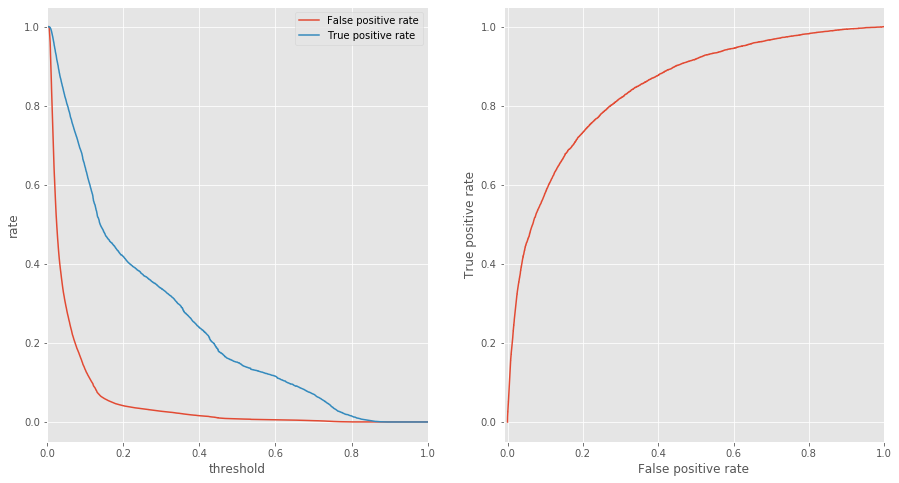

In [84]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)
ax1.plot(thresholds,fpr,label="False positive rate")
ax1.plot(thresholds,tpr,label="True positive rate")
ax1.set_ylabel("rate")
ax1.set_xlabel("threshold")
ax1.set_xlim(0,1)


ax2 = fig.add_subplot(122)
ax2.plot(fpr,tpr)
ax2.set_ylabel("True positive rate")
ax2.set_xlabel("False positive rate")
ax2.set_xlim(-0.01,1)

ax1.legend()
plt.show()

In [85]:
LR.score(features,train_df.SeriousDlqin2yrs)

0.9358833333333333

In [86]:
roc_auc_score(train_df.SeriousDlqin2yrs,proba)

0.8452896881627289

In [87]:
# Cross validation
np.mean(cross_val_score(LR, features, train_df.SeriousDlqin2yrs, cv=5,scoring="roc_auc"))

0.8440184340647761

# Random forest <a name="forest"></a>

In [88]:
rf_data = train_df.loc[:,["DebtRatio",
                "MonthlyIncome",
                "age",
                "NumberOfDependents",
                "RevolvingUtilizationOfUnsecuredLines",
                "NumberOfTime30-59DaysPastDueNotWorse",
                "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberRealEstateLoansOrLines",
                "NumberOfTimes90DaysLate",
               "NumberOfOpenCreditLinesAndLoans"]]

In [89]:
# imputation
replacing_missing = rf_data.median()
rf_data = rf_data.fillna(replacing_missing)

In [90]:
rf = RandomForestClassifier(random_state=42)
rf.fit(rf_data,train_df.SeriousDlqin2yrs)

RandomForestClassifier(random_state=42)

In [91]:
proba_ = rf.predict_proba(rf_data)[:,1]
fpr_, tpr_, thresholds = sklearn.metrics.roc_curve(train_df.SeriousDlqin2yrs,proba_)

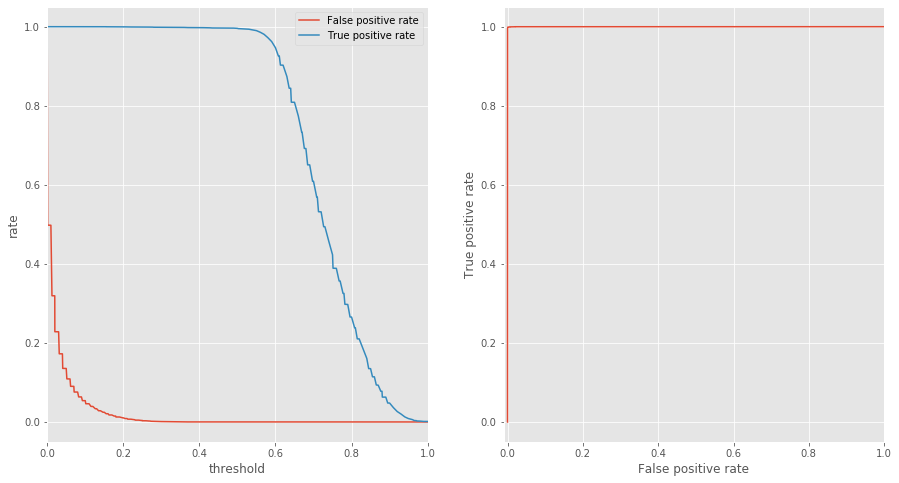

In [92]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)
ax1.plot(thresholds,fpr_,label="False positive rate")
ax1.plot(thresholds,tpr_,label="True positive rate")
ax1.set_ylabel("rate")
ax1.set_xlabel("threshold")
ax1.set_xlim(0,1)


ax2 = fig.add_subplot(122)
ax2.plot(fpr_,tpr_)
ax2.set_ylabel("True positive rate")
ax2.set_xlabel("False positive rate")
ax2.set_xlim(-0.01,1)

ax1.legend()
plt.show()

In [93]:
roc_auc_score(train_df.SeriousDlqin2yrs,proba_)

0.9999755462012415

In [94]:
np.mean(cross_val_score(rf, rf_data, train_df.SeriousDlqin2yrs, cv=5,scoring="roc_auc"))

0.8387571677529779

In [237]:
auc_train = []
auc_cross = []

for i in range(2,50):
    print(i)
    rf_ = RandomForestClassifier(random_state=42,max_depth = i)
    rf_.fit(rf_data,train_df.SeriousDlqin2yrs)
    proba_ = rf_.predict_proba(rf_data)[:,1]
    auc_train.append(roc_auc_score(train_df.SeriousDlqin2yrs,proba_))
    auc_cross.append(np.mean(cross_val_score(rf_, rf_data, train_df.SeriousDlqin2yrs, cv=5,scoring="roc_auc")))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [261]:
learning_1 = pd.DataFrame({"max_depth":list(range(2,50)),"auc":auc_train,"methodology":"training"})
learning_2 = pd.DataFrame({"max_depth":list(range(2,50)),"auc":auc_cross,"methodology":"cross-validation"})
learning_result = pd.concat([learning_1,learning_2])

In [95]:
#learning_result.to_csv("learning_result.csv",index=False)
#learning_result = pd.read_csv("learning_result.csv")

In [96]:
learning_result

,max_depth,auc,methodology
0,2,0.846624,training
1,3,0.853454,training
2,4,0.856696,training
3,5,0.860282,training
4,6,0.863864,training
...,...,...,...
91,45,0.838834,cross-validation
92,46,0.838859,cross-validation
93,47,0.838851,cross-validation
94,48,0.838848,cross-validation


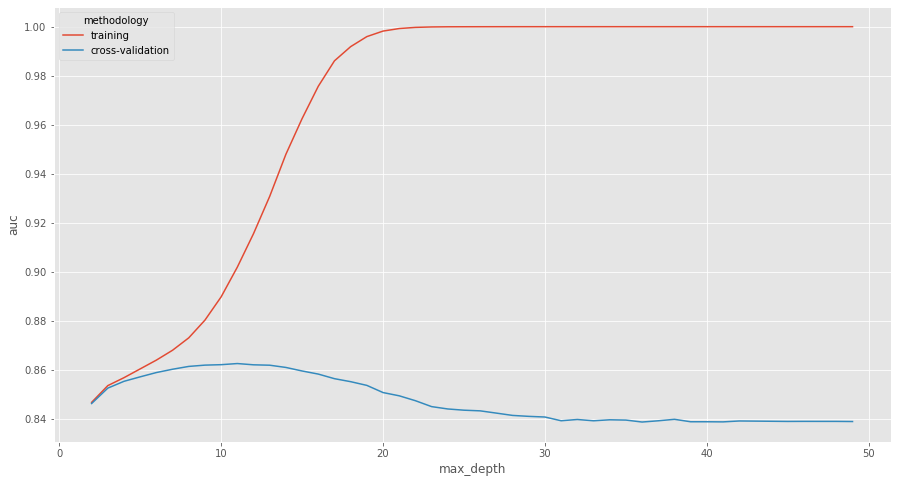

In [97]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(x = "max_depth",y = "auc",data = learning_result,hue = "methodology")
plt.show()

In [98]:
rf = RandomForestClassifier(random_state=42,max_depth = 10)
rf.fit(rf_data,train_df.SeriousDlqin2yrs)
proba_ = rf.predict_proba(rf_data)[:,1]
fpr_, tpr_, thresholds = sklearn.metrics.roc_curve(train_df.SeriousDlqin2yrs,proba_)

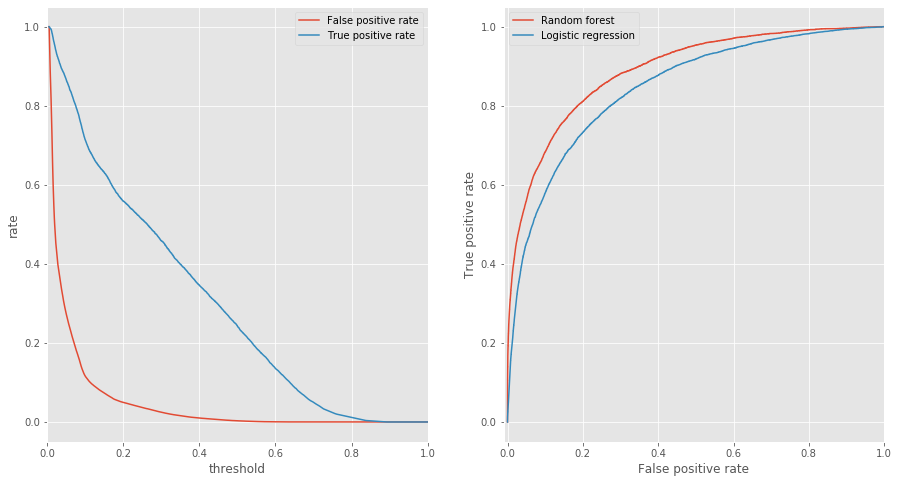

In [99]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)
ax1.plot(thresholds,fpr_,label="False positive rate")
ax1.plot(thresholds,tpr_,label="True positive rate")
ax1.set_ylabel("rate")
ax1.set_xlabel("threshold")
ax1.set_xlim(0,1)


ax2 = fig.add_subplot(122)
ax2.plot(fpr_,tpr_,label="Random forest")
ax2.plot(fpr,tpr,label="Logistic regression")
ax2.set_ylabel("True positive rate")
ax2.set_xlabel("False positive rate")
ax2.set_xlim(-0.01,1)

ax2.legend()
ax1.legend()
plt.show()

In [100]:
np.mean(cross_val_score(rf, rf_data, train_df.SeriousDlqin2yrs, cv=5,scoring="roc_auc"))

0.8620007409471692

# Interpretation <a name="interpretation"></a>

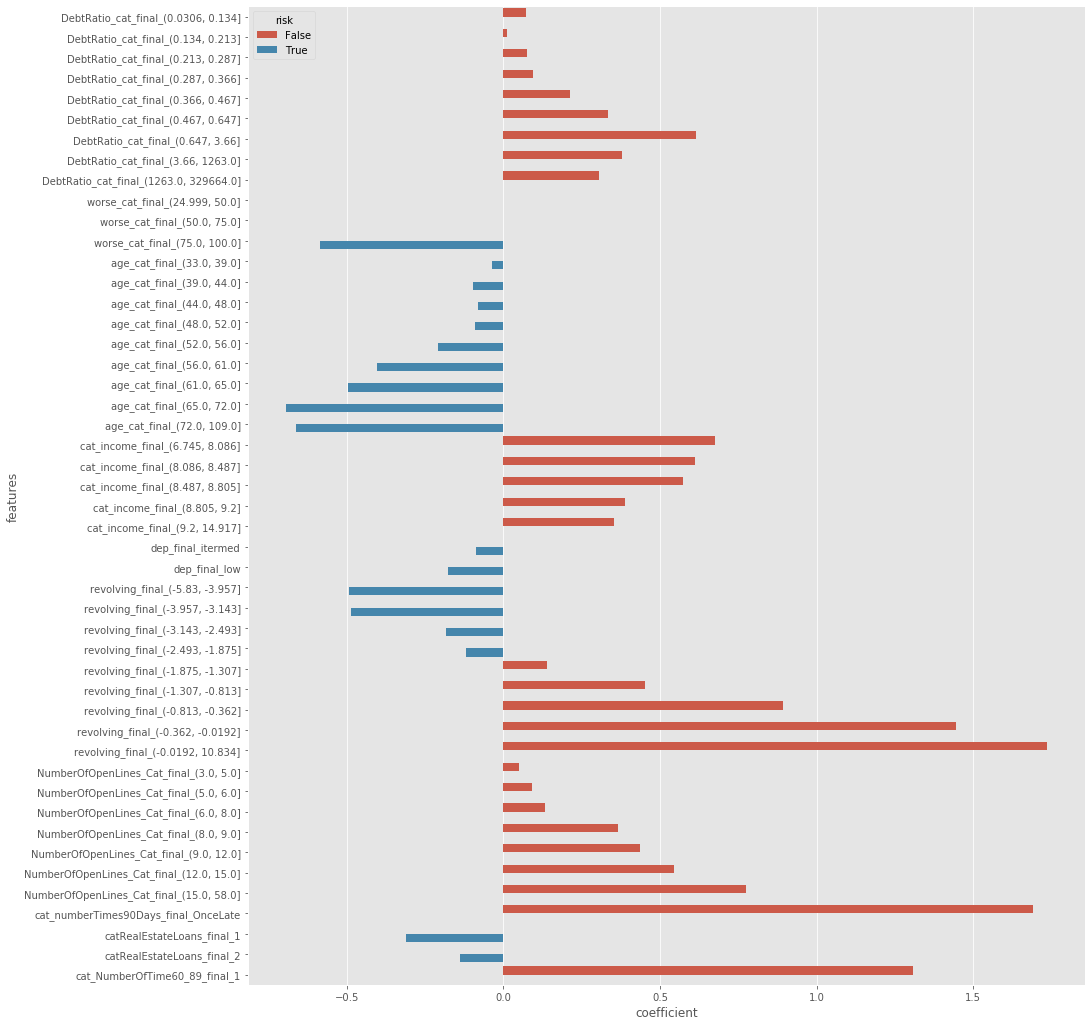

In [89]:
fig = plt.figure(figsize=(15,18))

coefficient_lr = pd.DataFrame({"features":features.columns.values.tolist(),
              "coefficient":list(LR.coef_[0,])})
coefficient_lr["risk"] = coefficient_lr.coefficient < 0
sns.barplot(data=coefficient_lr,y="features",x="coefficient",hue="risk")
plt.show()

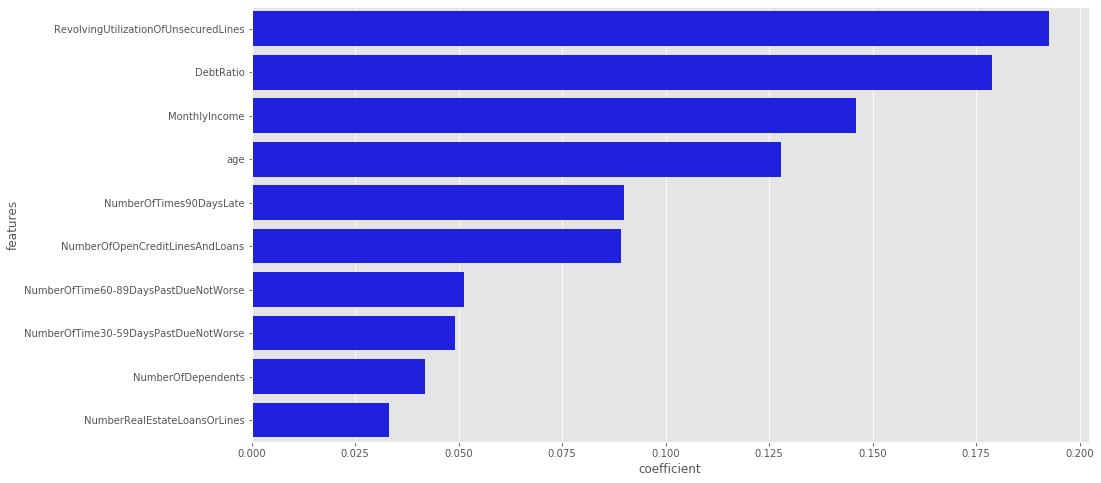

In [105]:
fig = plt.figure(figsize=(15,8))

coefficient_rf = pd.DataFrame({"features":rf_data.columns.values.tolist(),
              "coefficient":list(rf.feature_importances_)}).sort_values("coefficient",ascending=False)
sns.barplot(data=coefficient_rf,y="features",x="coefficient",color="blue")
plt.show()


http://www.mwsug.org/proceedings/2013/AA/MWSUG-2013-AA14.pdf